# Coursera Capstone Project - FINAL

This is fulfilment of coursera course and will be mainly used for capstone project

In [1]:
#scientific library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#web scraping library
import requests
from bs4 import BeautifulSoup
import time

In [3]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins
from geopy.geocoders import Nominatim

print('Libraries imported.')

Libraries imported.


## Query Schools in Davao City

This <a href="https://data.gov.ph/dataset/public-secondary-school-enrollment-statistics">data source</a> will show us the Department of Education public secondary school enrollment statistics

In [4]:
#import data

pubs = pd.read_csv("deped.csv",  encoding = "ISO-8859-1")

In [5]:
pubs.describe() #describe data

,school_id,enrollment
count,64656.000000,64656.000000
mean,306478.196981,92.878202
std,6259.015228,126.214102
min,300001.000000,0.000000
25%,302046.000000,28.000000
50%,304098.500000,51.000000
75%,309163.000000,103.000000
max,356059.000000,2339.000000


In [6]:
pubs.head()

,school_id,school_name,region,province,municipality,division,year_level,gender,enrollment,latitude,longitude
0,300001,Adams National High School,Region I - Ilocos Region,Ilocos Norte,Adams,Ilocos Norte,first year,male,24,18.45859,120.9057909
1,300002,Bacarra NCHS,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,first year,male,299,18.24977222,120.61305
2,300003,Bangui NHS,Region I - Ilocos Region,Ilocos Norte,Bangui,Ilocos Norte,first year,male,89,18.5356735,120.769735
3,300004,Banna National High School,Region I - Ilocos Region,Ilocos Norte,Banna (Espiritu),Ilocos Norte,first year,male,50,17.98035278,120.6581583
4,300005,Batac National High School,Region I - Ilocos Region,Ilocos Norte,City Of Batac,Batac City,first year,male,66,18.11075,120.5718778


We will remove municipality which does not belongs to Davao del Sur.

In [7]:
pubs = pubs[pubs['province'] == "Davao Del Sur"]
skuls = pubs.groupby(['school_name','municipality'], as_index=False).agg({"enrollment": "sum"})

In [8]:
skul_per_muni = skuls.groupby('municipality', as_index=False).count()
skul_per_muni = skul_per_muni.drop('school_name', 1)
skul_per_muni.sort_values(by=['enrollment'],ascending=True)

,municipality,enrollment
8,Malalag,1
11,Padada,1
0,Bansalan,2
4,Hagonoy,2
14,Sarangani,2
15,Sulop,2
3,Don Marcelino,3
6,Kiblawan,3
7,Magsaysay,3
5,Jose Abad Santos (Trinidad),4


Text(0.5,1,'No. of secondary school per municipality')

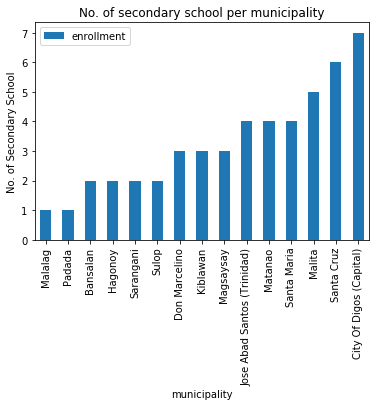

In [9]:
skul_per_muni_nodav = skul_per_muni[skul_per_muni['municipality'] != "Davao City"].set_index('municipality')
skul_per_muni_nodav = skul_per_muni_nodav.sort_values(by=['enrollment'],ascending=True)

x = skul_per_muni_nodav.plot(kind='bar')
x.set_ylabel("No. of Secondary School")
x.set_title("No. of secondary school per municipality")

In [10]:
pubs_no_dav = pubs[pubs['municipality'].isin(['Bansalan','City Of Digos (Capital)', 'Hagonoy','Kiblawan', 'Magsaysay', 'Malalag','Matanao','Padada','Santa Cruz', 'Sulop'])]
pubs = pubs[pubs['municipality'].isin(['Davao City','Bansalan','City Of Digos (Capital)', 'Hagonoy','Kiblawan', 'Magsaysay', 'Malalag','Matanao','Padada','Santa Cruz', 'Sulop'])]

In [11]:
pubs_no_dav['municipality'].unique()

array(['Santa Cruz', 'Magsaysay', 'Malalag', 'Kiblawan', 'Hagonoy',
       'Bansalan', 'Matanao', 'Sulop', 'City Of Digos (Capital)',
       'Padada'], dtype=object)

In [12]:
pubs.head().sort_values(by='school_name',ascending=True)

,school_id,school_name,region,province,municipality,division,year_level,gender,enrollment,latitude,longitude
4207,304265,Barayong NHS,Region XI - Davao Region,Davao Del Sur,Magsaysay,Davao del Sur,first year,male,204,6.782537981,125.1720136
4212,304270,Davao Del Sur SOF,Region XI - Davao Region,Davao Del Sur,Malalag,Davao del Sur,first year,male,288,6.60139,125.396202
4205,304263,Federico Yap National High School,Region XI - Davao Region,Davao Del Sur,Santa Cruz,Davao del Sur,first year,male,142,6.9024732,125.4587236
4216,304274,Gov. N. Llanos NHS,Region XI - Davao Region,Davao Del Sur,Kiblawan,Davao del Sur,first year,male,89,6.464782,125.264267
4217,304275,Hagonoy National High School,Region XI - Davao Region,Davao Del Sur,Hagonoy,Davao del Sur,first year,male,293,6.6793507,125.3496027


In [13]:
pub_fields = pubs[['school_name','municipality','gender', 'enrollment', 'latitude','longitude']]
pub_fields.head()

,school_name,municipality,gender,enrollment,latitude,longitude
4205,Federico Yap National High School,Santa Cruz,male,142,6.9024732,125.4587236
4207,Barayong NHS,Magsaysay,male,204,6.782537981,125.1720136
4212,Davao Del Sur SOF,Malalag,male,288,6.60139,125.396202
4216,Gov. N. Llanos NHS,Kiblawan,male,89,6.464782,125.264267
4217,Hagonoy National High School,Hagonoy,male,293,6.6793507,125.3496027


In [14]:
# pubs.groupby(['enrollment','gender']).agg(['count'])
pop_by_school = pubs.groupby('school_name', as_index=False).agg({"enrollment": "sum"}).sort_values('enrollment',ascending=False)
pop_by_muni = pubs.groupby('municipality', as_index=False).agg({"enrollment": "sum"}).sort_values('enrollment',ascending=False)
pop_by_muni.head(10)


,municipality,enrollment
2,Davao City,86137
1,City Of Digos (Capital),11187
9,Santa Cruz,5411
7,Matanao,4056
5,Magsaysay,2503
3,Hagonoy,2238
0,Bansalan,2058
4,Kiblawan,2003
10,Sulop,1992
6,Malalag,1711


Text(0.5,1,'Enrollee by Municipality')

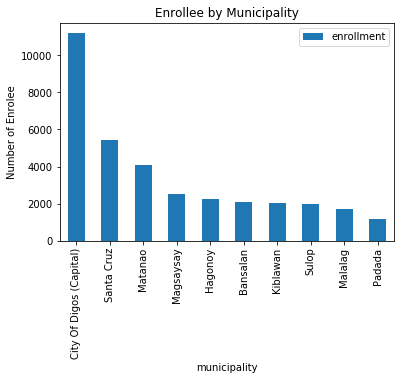

In [15]:
pup_by_muni_nodav = pop_by_muni[pop_by_muni['municipality'] != "Davao City"]
pup_by_muni = pop_by_muni[pop_by_muni['municipality'] != "EDavao City"]

#no davao
y = pup_by_muni_nodav.set_index('municipality').plot(kind='bar',stacked=True)
y.set_ylabel('Number of Enrolee')
y.set_title('Enrollee by Municipality')
# skul_muni[skul_muni['municipality'] != 'Davao City'].set_index('municipality')

In [16]:
#check digos only
digs = pubs[pubs['municipality'] == "City Of Digos (Capital)"]
digs_skul = digs.groupby(['school_name','municipality']).agg({'enrollment':'sum'}).reset_index()
digs_skul.groupby('municipality').agg({'enrollment':'sum'})
# digs_skul

,enrollment
municipality,
City Of Digos (Capital),11187


In [17]:
muni_skulcount_enrolment = skul_per_muni.merge(pup_by_muni_nodav, on="municipality") #no davao
# muni_skulcount_enrolment = skul_per_muni.merge(pup_by_muni, on="municipality") #with davao
muni_skulcount_enrolment

,municipality,enrollment_x,enrollment_y
0,Bansalan,2,2058
1,City Of Digos (Capital),7,11187
2,Hagonoy,2,2238
3,Kiblawan,3,2003
4,Magsaysay,3,2503
5,Malalag,1,1711
6,Matanao,4,4056
7,Padada,1,1178
8,Santa Cruz,6,5411
9,Sulop,2,1992


In [18]:
muni_skulcount_enrolment['student_per_school'] = np.round(muni_skulcount_enrolment['enrollment_y'] / muni_skulcount_enrolment['enrollment_x'], decimals=0)
muni_skulcount_enrolment['id_clrm_per_school'] = np.round(muni_skulcount_enrolment['student_per_school'] / 36,decimals=0)
muni_skulcount_enrolment

,municipality,enrollment_x,enrollment_y,student_per_school,id_clrm_per_school
0,Bansalan,2,2058,1029.0,29.0
1,City Of Digos (Capital),7,11187,1598.0,44.0
2,Hagonoy,2,2238,1119.0,31.0
3,Kiblawan,3,2003,668.0,19.0
4,Magsaysay,3,2503,834.0,23.0
5,Malalag,1,1711,1711.0,48.0
6,Matanao,4,4056,1014.0,28.0
7,Padada,1,1178,1178.0,33.0
8,Santa Cruz,6,5411,902.0,25.0
9,Sulop,2,1992,996.0,28.0


Text(0.5,1,'No. of Public School VS Student Population')

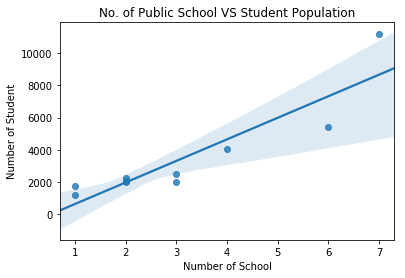

In [19]:
# plt.scatter(x=muni_skulcount_enrolment['enrollment'],y=muni_skulcount_enrolment['count'])
# plt.show()

# Without regression fit:
ax = sns.regplot(x=muni_skulcount_enrolment['enrollment_x'], y=muni_skulcount_enrolment['enrollment_y'], fit_reg=True)
ax.set(xlabel='Number of School', ylabel='Number of Student')
ax.set_title("No. of Public School VS Student Population")
#sns.plt.show()


In [20]:
school_gender = pubs.groupby(['school_name','gender'], as_index=False).agg({"enrollment": "sum"}).sort_values('enrollment',ascending=False)
muni_gender = pubs.groupby(['municipality','gender'], as_index=False).agg({"enrollment": "sum"}).sort_values('enrollment',ascending=False)

In [21]:
school_gender.head()

,school_name,gender,enrollment
46,Davao City NHS,female,4733
52,Digos City NHS (Davao Del Sur NHS),female,4687
47,Davao City NHS,male,4215
53,Digos City NHS (Davao Del Sur NHS),male,4039
44,Daniel R. Aguinaldo NHS (Matina NHS),female,3616


In [22]:
muni_gender.head(6)

,municipality,gender,enrollment
4,Davao City,female,44340
5,Davao City,male,41797
2,City Of Digos (Capital),female,5947
3,City Of Digos (Capital),male,5240
18,Santa Cruz,female,2820
19,Santa Cruz,male,2591


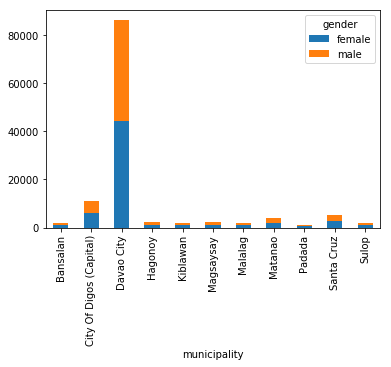

In [23]:
a = muni_gender.pivot(index='municipality', columns='gender', values='enrollment')
a.plot(kind='Bar', stacked=True)
# muni_gender_nodav[muni_gender_nodav['municipality'] == "Davao City"]

Text(0.5,1,'Distribution of Gender in Student Population')

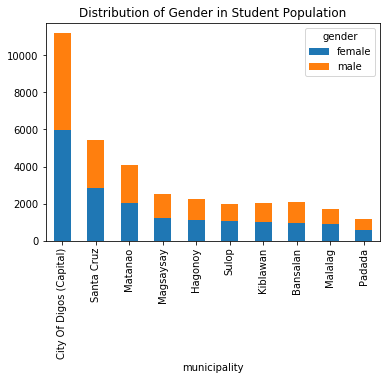

In [24]:
a_no_dav = muni_gender[muni_gender['municipality'] != "Davao City"]
# pop_by_muni[pop_by_muni['municipality'] != "Davao City"]
# a_no_dav.plot(kind='Bar', stacked=True)

a_no_dav = a_no_dav.pivot(index='municipality', columns='gender', values='enrollment').sort_values('female',ascending=False)
aa = a_no_dav.plot(kind='Bar', stacked=True)
aa.set_title('Distribution of Gender in Student Population')

# a_no_dav.sort_values('municipality')

In [25]:
ss = pd.concat([a,pd.DataFrame(a.sum(axis=1),columns=['Total'])],axis=1)

In [26]:
pubs.head() #check data

,school_id,school_name,region,province,municipality,division,year_level,gender,enrollment,latitude,longitude
4205,304263,Federico Yap National High School,Region XI - Davao Region,Davao Del Sur,Santa Cruz,Davao del Sur,first year,male,142,6.9024732,125.4587236
4207,304265,Barayong NHS,Region XI - Davao Region,Davao Del Sur,Magsaysay,Davao del Sur,first year,male,204,6.782537981,125.1720136
4212,304270,Davao Del Sur SOF,Region XI - Davao Region,Davao Del Sur,Malalag,Davao del Sur,first year,male,288,6.60139,125.396202
4216,304274,Gov. N. Llanos NHS,Region XI - Davao Region,Davao Del Sur,Kiblawan,Davao del Sur,first year,male,89,6.464782,125.264267
4217,304275,Hagonoy National High School,Region XI - Davao Region,Davao Del Sur,Hagonoy,Davao del Sur,first year,male,293,6.6793507,125.3496027


In [27]:
#select only all davao del sur school
pubs_df = pubs[['province','school_name','year_level','gender','enrollment','latitude','longitude']].sort_values('school_name')

In [28]:
# Population by school
pubs_pops = pubs_df.groupby('school_name').agg(np.sum).reset_index()

#coordinates by school
pubs_coor = pubs_df[['school_name','longitude','latitude']].drop_duplicates('school_name')

#population and coordinates by school
pubs_coor_pops = pubs_pops.merge(pubs_coor, on='school_name')

pubs_coor_pops['longitude'] = pubs_coor_pops.longitude.convert_objects(convert_numeric=True)


pubs_coor_pops['latitude'] = pubs_coor_pops.latitude.convert_objects(convert_numeric=True)

#weather["Temp"] = weather.Temp.astype(float)
#pubs_coor_pops.dtypes
pubs_coor_pops.sort_values('enrollment',ascending=False)

pubs_coor_pops.tail() #check
pubs_coor_pops = pubs_coor_pops.dropna()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]


# Visualizing Public schools in Davao City

In [29]:
address = 'Digos City, Philippines'
geolocator = Nominatim(user_agent="Davao")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Davao City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Davao City are 6.7443504, 125.3565975.


Plotting Public school in Davao City

In [30]:
# create map of Davao del Sur using latitude and longitude values
map_davao = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map
for lat,lng,label,count in zip(pubs_coor_pops['latitude'],pubs_coor_pops['longitude'],pubs_coor_pops['school_name'],pubs_coor_pops['enrollment']):
    label = '{}'.format(label)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_davao)
    
map_davao

## Classify School By Number of Enrollee

After presenting the location of schools, we will show the student population by school 

In [31]:
#prepare color
x = np.arange(9)
ys = [i + x + (i*x)**2 for i in range(9)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['#fbfadd','#f7e8a7','#fdd277','#f9ab56','#e78f63','#e75044','#d01428','#7e0428','#7e0428']

In [32]:
#we will categorize the enrollee, 9 as the highest and it represents 9000 students. 
aa = pubs_coor_pops
aa['cat'] = aa['enrollment'] // 1000 + 1

In [33]:
# create map of Davao del Sur using latitude and longitude values
map_davao = folium.Map(location=[latitude, longitude], zoom_start=8, tiles="Stamen Terrain",)


# add markers to map
for lat,lng,label,count,cat in zip(aa['latitude'],aa['longitude'],aa['school_name'],aa['enrollment'],aa['cat']):
    label = '{}'.format(label)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        fill=True,
        #fill_color='#3186cc',
        color=rainbow[cat-1],
        fill_opacity=1,
        parse_html=False).add_to(map_davao)
    
#specify the min and max values of your data
import branca
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 8948)
colormap = colormap.to_step(index=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 9000])
colormap.caption = 'Davao City Public Secondary School Population, 2015'
colormap.add_to(map_davao)

map_davao


# Census

This section will explore the resident <a href="https://psa.gov.ph/content/population-region-xi-davao-based-2015-census-population">population based on 2015 data.</a>

In [34]:
#Read and label census data
census = pd.read_excel('census.xlsx', skiprows=259, header=None)
census_dav = census[0:400].drop([0,3],axis=1)
census_dav.columns = ['area','total']
census_dav = census_dav.dropna()

In [35]:
# census_dav

In [36]:
#Get Davao del sur municipality only (capitalize)
census_dav_sur = census_dav[census_dav['area'].str.match('^.*[A-Z]$')]

In [37]:
cens = np.asarray(census_dav_sur)
cens = pd.DataFrame(cens)
cens.columns = ['MUNICIPALI','total']

In [38]:
cens['total'] = cens['total'].astype(int) #convert string total to integer
cens.dtypes #check data types
cens

,MUNICIPALI,total
0,BANSALAN,60440
1,CITY OF DIGOS,169393
2,HAGONOY,53309
3,KIBLAWAN,48897
4,MAGSAYSAY,53876
5,MALALAG,38731
6,MATANAO,56755
7,PADADA,26587
8,SANTA CRUZ,90987
9,SULOP,33613


In [39]:
cens_no_dav = cens[cens['MUNICIPALI'] != 'DAVAO CITY'].reset_index()
cens_no_dav

,index,MUNICIPALI,total
0,0,BANSALAN,60440
1,1,CITY OF DIGOS,169393
2,2,HAGONOY,53309
3,3,KIBLAWAN,48897
4,4,MAGSAYSAY,53876
5,5,MALALAG,38731
6,6,MATANAO,56755
7,7,PADADA,26587
8,8,SANTA CRUZ,90987
9,9,SULOP,33613


In [40]:
cens_no_dav.append(pd.Series(cens_no_dav.sum(),name='Total'))
# tots = cens_no_dav.agg({"total": "sum"})


,index,MUNICIPALI,total
0,0,BANSALAN,60440
1,1,CITY OF DIGOS,169393
2,2,HAGONOY,53309
3,3,KIBLAWAN,48897
4,4,MAGSAYSAY,53876
5,5,MALALAG,38731
6,6,MATANAO,56755
7,7,PADADA,26587
8,8,SANTA CRUZ,90987
9,9,SULOP,33613


Though not part of my dataset, I added another column 'zip' which represents the <a href="https://en.wikipedia.org/wiki/List_of_ZIP_codes_in_the_Philippines#Davao_del_Sur">zip code of the municipality. </a>

In [41]:
# r = 'https://geographic.org/streetview/philippines/region_11/davao_del_sur.html'
# z = []
# p = []
# for b in r:
#     html = requests.get(r).text
#     soup = BeautifulSoup(html,"html.parser")
#     table = soup.find('ul')

#     try:
#         for row in table.find_all('li'):
# #             cols = row.find_all('a')
#             z.append((cols[0].text.strip(), cols[1].text.strip()))
#     except:pass

In [42]:
# ADD ZIPCODE
zipc = { 'ZIP': [8005,8002,8006,8008,8004,8010,8003,8007,8001,8009,8000] }
cens['zip'] = pd.DataFrame.from_dict(zipc)

Normalizing the population data using 'log' function.

In [43]:
cens['norm'] = np.log(cens['total'])
cens['norm'].fillna(0, inplace=True)
cens #check

,MUNICIPALI,total,zip,norm
0,BANSALAN,60440,8005,11.009406
1,CITY OF DIGOS,169393,8002,12.039977
2,HAGONOY,53309,8006,10.883860
3,KIBLAWAN,48897,8008,10.797471
4,MAGSAYSAY,53876,8004,10.894440
5,MALALAG,38731,8010,10.564396
6,MATANAO,56755,8003,10.946499
7,PADADA,26587,8007,10.188178
8,SANTA CRUZ,90987,8001,11.418472
9,SULOP,33613,8009,10.422668


The data is now ready for plotting 

# MAP MUNICIPALITY

In [44]:
import json 
import os

dds = os.path.join('dds.json')
dd = json.load(open(dds))

In [45]:
m = folium.Map(location=[latitude, longitude], zoom_start=8)
# folium.GeoJson(dd).add_to(m)

threshold_scale = np.linspace(cens['norm'].min(), cens['norm'].max(),6, dtype=int)
#threshold_scale = list(threshold_scale)
threshold_scale = [9,11,12,13,14,15]

folium.Choropleth(
    geo_data=dd,
    data=cens,
    columns=['zip', 'norm'],
    key_on='feature.properties.ZIPCODE',
    fill_color='YlGn',
    fill_opacity=0.6,
    legend_name='Population in Davao del Sur 2015(%)',
    threshold_scale = threshold_scale,
    line_opacity=0.05,
).add_to(map_davao)
map_davao


In [46]:
map_davao = folium.Map(location=[latitude, longitude], zoom_start=8,tiles="Stamen Toner")
# folium.GeoJson(dd).add_to(m)

threshold_scale = np.linspace(cens['norm'].min(), cens['norm'].max(),6, dtype=int)
#threshold_scale = list(threshold_scale)
threshold_scale = [9,11,12,13,14,15]

folium.Choropleth(
    geo_data=dd,
    data=cens,
    columns=['zip', 'norm'],
    key_on='feature.properties.ZIPCODE',
    fill_color='YlGn',
    fill_opacity=0.6,
    legend_name='Population in Davao del Sur 2015(%)',
    threshold_scale = threshold_scale,
    line_opacity=0.05,
    reset=True
)
map_davao


In [47]:
map = folium.Map(location=[latitude, longitude], zoom_start=8,tiles="Stamen Toner")
# folium.GeoJson(dd).add_to(m)

threshold_scale = np.linspace(cens['norm'].min(), cens['norm'].max(),6, dtype=int)
#threshold_scale = list(threshold_scale)
threshold_scale = [9,11,12,13,14,15]

folium.Choropleth(
    geo_data=dd,
    data=cens,
    columns=['zip', 'norm'],
    key_on='feature.properties.ZIPCODE',
    fill_color='YlGn',
    fill_opacity=0.6,
    legend_name='Population in Davao del Sur 2015(%)',
    threshold_scale = threshold_scale,
    line_opacity=0.05,
    reset=True
)
map_davao


In [48]:
s = cens
s.rename(columns={'MUNICIPALI':'municipality'}, inplace=True)
s = cens.sort_values('total', ascending=False).reset_index()
s = s.drop("index", 1)

muni_skul = ss.reset_index()
# muni_skul = muni_skul.drop(['male','female'], 1)
# muni_skul_cens = muni_skul.merge(s, on="municipality")
# muni_skul.dtypes



In [49]:
muni_skul = muni_skul.sort_values('Total', ascending=False)
muni_skul['municipality'] = muni_skul['municipality'].str.upper()
#rename CITY DIGOS (CAPITAL)
muni_skul.loc[1:2]['municipality'] = "CITY OF DIGOS"

In [50]:
muni_skul

,municipality,female,male,Total
2,DAVAO CITY,44340,41797,86137
1,CITY OF DIGOS (CAPITAL),5947,5240,11187
9,SANTA CRUZ,2820,2591,5411
7,MATANAO,2050,2006,4056
5,MAGSAYSAY,1235,1268,2503
3,HAGONOY,1104,1134,2238
0,BANSALAN,972,1086,2058
4,KIBLAWAN,1007,996,2003
10,SULOP,1041,951,1992
6,MALALAG,915,796,1711


In [51]:
muni_skul_cens = muni_skul.merge(s,on="municipality")
muni_skul_cens = muni_skul_cens.drop(['female','male','zip','norm'],1)
muni_skul_cens.columns = ['municipality', 'Student','Population']
muni_skul_cens['%'] = np.round(muni_skul_cens['Student']/muni_skul_cens['Population'] * 100, decimals=0)
muni_skul_cens

,municipality,Student,Population,%
0,DAVAO CITY,86137,1632991,5.0
1,SANTA CRUZ,5411,90987,6.0
2,MATANAO,4056,56755,7.0
3,MAGSAYSAY,2503,53876,5.0
4,HAGONOY,2238,53309,4.0
5,BANSALAN,2058,60440,3.0
6,KIBLAWAN,2003,48897,4.0
7,SULOP,1992,33613,6.0
8,MALALAG,1711,38731,4.0
9,PADADA,1178,26587,4.0


In [52]:
sp=skul_per_muni 
sp = sp.sort_values('enrollment', ascending=False)
sp['municipality'] = sp['municipality'].str.upper()

sp.loc[1:1]['municipality'] = "CITY OF DIGOS"
t = muni_skul_cens.merge(sp, on="municipality")
t

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,municipality,Student,Population,%,enrollment
0,DAVAO CITY,86137,1632991,5.0,70
1,SANTA CRUZ,5411,90987,6.0,6
2,MATANAO,4056,56755,7.0,4
3,MAGSAYSAY,2503,53876,5.0,3
4,HAGONOY,2238,53309,4.0,2
5,BANSALAN,2058,60440,3.0,2
6,KIBLAWAN,2003,48897,4.0,3
7,SULOP,1992,33613,6.0,2
8,MALALAG,1711,38731,4.0,1
9,PADADA,1178,26587,4.0,1


# Prediction



In [53]:
# pubs_no_dav['municipality'].unique()
pubs['municipality'].unique()

array(['Santa Cruz', 'Magsaysay', 'Malalag', 'Kiblawan', 'Hagonoy',
       'Bansalan', 'Matanao', 'Sulop', 'Davao City',
       'City Of Digos (Capital)', 'Padada'], dtype=object)

In [54]:
# df = pubs_no_dav[['school_name', 'municipality','enrollment', 'latitude','longitude']]
df = pubs[['school_name', 'municipality','enrollment', 'latitude','longitude']]
df.head()

,school_name,municipality,enrollment,latitude,longitude
4205,Federico Yap National High School,Santa Cruz,142,6.9024732,125.4587236
4207,Barayong NHS,Magsaysay,204,6.782537981,125.1720136
4212,Davao Del Sur SOF,Malalag,288,6.60139,125.396202
4216,Gov. N. Llanos NHS,Kiblawan,89,6.464782,125.264267
4217,Hagonoy National High School,Hagonoy,293,6.6793507,125.3496027


In [55]:
df2 = df.groupby(['municipality','school_name','latitude','longitude']).agg({'enrollment':'sum'}).reset_index()

In [56]:
poi = {
    'municipality':['Bansalan','City Of Digos (Capital)','Hagonoy','Kiblawan','Magsaysay','Malalag','Matanao','Padada','Santa Cruz','Sulop','Davao City'],
    'poi_lat':[6.78639,6.74417 ,6.68861,6.61972,6.75583, 6.59861,6.70861,6.63972 , 6.83389 , 6.83389, 7.06389],
    'poi_long':[125.21278 ,125.35639,125.29778,125.25194,125.15000,125.40000,125.21639,125.34361 ,125.41528,125.34667,125.60833]
}
poi = pd.DataFrame.from_dict(poi)


# Bansalan lat lon = 6.78639 125.21278 
# Digos =6.74417 125.35639
# hagonoy = 6.68861 125.29778
# kiblawan = 6.61972 125.25194
# magsaysay = 6.75583 125.15000
# malalag = 6.59861 125.40000
# matanao = 6.70861 125.21639
# padada = 6.63972 125.34361 
# sta curz = 6.83389 125.41528 
# sulop = 6.59889 125.34667 

# https://en.wikipedia.org/wiki/Davao_del_Sur
# https://geographiclib.sourceforge.io/cgi-bin/GeoConvert?input=6%B035%26%238242%3B56%26%238243%3BN+125%B020%26%238242%3B48%26%238243%3BE&zone=-3&prec=0&option=Submit




In [57]:
poi

,municipality,poi_lat,poi_long
0,Bansalan,6.78639,125.21278
1,City Of Digos (Capital),6.74417,125.35639
2,Hagonoy,6.68861,125.29778
3,Kiblawan,6.61972,125.25194
4,Magsaysay,6.75583,125.15000
5,Malalag,6.59861,125.40000
6,Matanao,6.70861,125.21639
7,Padada,6.63972,125.34361
8,Santa Cruz,6.83389,125.41528
9,Sulop,6.83389,125.34667


In [58]:
# df2

In [59]:
df3 = df2.merge(poi, on = 'municipality')
# pd.DataFrame(df3[df3.municipality==df3.municipality]['municipality'], columns=['municipality']).reset_index(drop=True)
df3.head()

,municipality,school_name,latitude,longitude,enrollment,poi_lat,poi_long
0,Bansalan,Marber NHS,6.8394684,125.1714598,1109,6.78639,125.21278
1,Bansalan,Pedro A. Arches NHS,6.771074,125.228432,949,6.78639,125.21278
2,City Of Digos (Capital),Digos City NHS (Davao Del Sur NHS),6.750408,125.357255,8726,6.74417,125.35639
3,City Of Digos (Capital),Digos City NHS - Balabag HS Annex,6.7508186,125.3556809,219,6.74417,125.35639
4,City Of Digos (Capital),Digos City NHS - Igpit HS Annex,6.733794,125.329109,460,6.74417,125.35639


In [60]:
#convert coordinates to float
df3['longitude'] = pd.to_numeric(df3['longitude'])
df3['latitude'] = pd.to_numeric(df3['latitude'])
df3['poi_long'] = pd.to_numeric(df3['poi_long'])
df3['poi_lat'] = pd.to_numeric(df3['poi_lat'])

# df3.dtypes

In [61]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [62]:
class Haversine:
    '''
    use the haversine class to calculate the distance between
    two lon/lat coordnate pairs.
    output distance available in kilometers, meters, miles, and feet.
    example usage: Haversine([lon1,lat1],[lon2,lat2]).feet
    
    '''
    def __init__(self,coord1,coord2):
        lon1,lat1=coord1
        lon2,lat2=coord2
        
        R=6371000                               # radius of Earth in meters
        phi_1=math.radians(lat1)
        phi_2=math.radians(lat2)

        delta_phi=math.radians(lat2-lat1)
        delta_lambda=math.radians(lon2-lon1)

        a=math.sin(delta_phi/2.0)**2+\
           math.cos(phi_1)*math.cos(phi_2)*\
           math.sin(delta_lambda/2.0)**2
        c=2*math.atan2(math.sqrt(a),math.sqrt(1-a))
        
        self.meters=R*c                         # output distance in meters
        self.km=self.meters/1000.0              # output distance in kilometers
        self.miles=self.meters*0.000621371      # output distance in miles
        self.feet=self.miles*5280               # output distance in feet

if __name__ == "__Haversine__":
    main()

In [63]:
#  Haversine([-84.412977,39.152501],[-84.412946,39.152505]).feet

In [64]:
def haversine(lat1, lon1, lat2, lon2):

      R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c


In [65]:
df3['dist'] = np.round(df3.apply(lambda row: haversine(row['longitude'], 
                                            row['latitude'], 
                                            row['poi_long'], 
                                            row['poi_lat']), axis=1),decimals=2)

Text(0.5,1,'Student Population VS Distance from Point of Interest (km)')

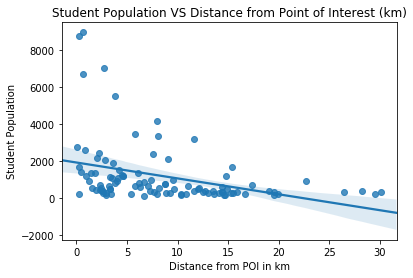

In [66]:
re = sns.regplot(x=df3['dist'], y=df3['enrollment'], fit_reg=True)
re.set(xlabel='Distance from POI in km', ylabel='Student Population')
# re.show()
re.set_title("Student Population VS Distance from Point of Interest (km)")

In [67]:
#TANAN SCHOOL
# pubs = pubs[pubs['province'] == "Davao Del Sur"]


In [68]:
df4 = df3[df3['municipality'] != "City Of Digos (Capital)"]

Text(0.5,1,'Latitude VS Longitude')

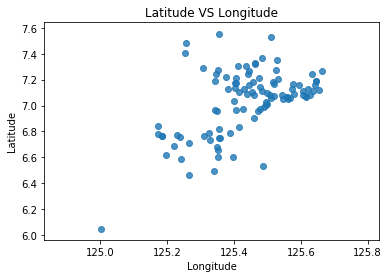

In [69]:
rr = sns.regplot(x=df3['longitude'], y=df3['latitude'], fit_reg=False)
rr.set(xlabel='Longitude', ylabel='Latitude')
rr.set_title("Latitude VS Longitude")

In [70]:
df4.head()

,municipality,school_name,latitude,longitude,enrollment,poi_lat,poi_long,dist
0,Bansalan,Marber NHS,6.839468,125.171460,1109,6.78639,125.21278,3.55
1,Bansalan,Pedro A. Arches NHS,6.771074,125.228432,949,6.78639,125.21278,1.24
9,Davao City,ALEJANDRA L. NAVARRO NHS,7.265141,125.665100,2126,7.06389,125.60833,9.00
10,Davao City,Baguio HS of Agriculture - Tambobong HS Annex,7.188397,125.343078,364,7.06389,125.60833,19.00
11,Davao City,Baguio National School of Arts and Trades,7.173137,125.403873,1200,7.06389,125.60833,14.80


In [71]:
this = df3.corr()

In [72]:
this["enrollment"].sort_values(ascending=False)

enrollment    1.000000
longitude     0.285695
poi_long      0.046081
poi_lat       0.030562
latitude     -0.069182
dist         -0.355275
Name: enrollment, dtype: float64

In [73]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19f5c630>,
      dtype=object)

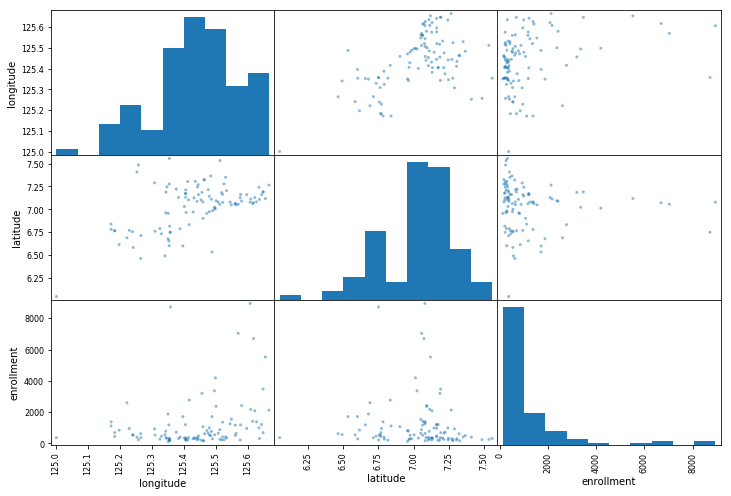

In [74]:
attributes = ["longitude","latitude","enrollment"]
scatter_matrix(df3[attributes], figsize=(12,8))